<a href="https://colab.research.google.com/github/PiotrusWatson/level4project/blob/master/data/ipynbs/textual_entailment_snli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##HAHA ITS TIME TO SPEND 5 HOURS DOWNLOADING THINGS

lets get the snli dataset baybee

In [2]:
!wget https://nlp.stanford.edu/projects/snli/snli_1.0.zip
!unzip snli_1.0.zip

--2020-03-11 15:40:44--  https://nlp.stanford.edu/projects/snli/snli_1.0.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94550081 (90M) [application/zip]
Saving to: ‘snli_1.0.zip.1’

snli_1.0.zip.1      100%[===================>]  90.17M  35.4MB/s    in 2.5s    

2020-03-11 15:40:47 (35.4 MB/s) - ‘snli_1.0.zip.1’ saved [94550081/94550081]

Archive:  snli_1.0.zip
replace snli_1.0/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
# Download the Glove.zip file and expand it.
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-03-11 15:43:10--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-03-11 15:43:10--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-03-11 15:43:10--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [4]:
# Get the PolitiFact Dataset from the location provided in the DeClarE paper.
!wget http://resources.mpi-inf.mpg.de/impact/dl_cred_analysis/PolitiFact.zip
!unzip PolitiFact.zip

--2020-03-11 15:51:04--  http://resources.mpi-inf.mpg.de/impact/dl_cred_analysis/PolitiFact.zip
Resolving resources.mpi-inf.mpg.de (resources.mpi-inf.mpg.de)... 139.19.206.46
Connecting to resources.mpi-inf.mpg.de (resources.mpi-inf.mpg.de)|139.19.206.46|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4976217 (4.7M) [application/zip]
Saving to: ‘PolitiFact.zip’

PolitiFact.zip      100%[===================>]   4.75M  5.01MB/s    in 0.9s    

2020-03-11 15:51:05 (5.01 MB/s) - ‘PolitiFact.zip’ saved [4976217/4976217]

Archive:  PolitiFact.zip
   creating: PolitiFact/
  inflating: PolitiFact/README       
  inflating: PolitiFact/politifact.tsv  


In [5]:
!git clone https://github.com/FakeNewsChallenge/fnc-1.git


Cloning into 'fnc-1'...
remote: Enumerating objects: 49, done.
remote: Total 49 (delta 0), reused 0 (delta 0), pack-reused 49
Unpacking objects: 100% (49/49), done.


In [6]:
!git clone https://github.com/FakeNewsChallenge/fnc-1-baseline.git
import sys
sys.path.insert(1, 'fnc-1-baseline/utils')

Cloning into 'fnc-1-baseline'...
remote: Enumerating objects: 121, done.
remote: Total 121 (delta 0), reused 0 (delta 0), pack-reused 121
Receiving objects: 100% (121/121), 23.99 KiB | 1.50 MiB/s, done.
Resolving deltas: 100% (63/63), done.


In [7]:
# Get the Snopes Dataset from the location provided in the DeClarE paper.
!wget http://resources.mpi-inf.mpg.de/impact/dl_cred_analysis/Snopes.zip
!unzip Snopes.zip

--2020-03-11 15:51:13--  http://resources.mpi-inf.mpg.de/impact/dl_cred_analysis/Snopes.zip
Resolving resources.mpi-inf.mpg.de (resources.mpi-inf.mpg.de)... 139.19.206.46
Connecting to resources.mpi-inf.mpg.de (resources.mpi-inf.mpg.de)|139.19.206.46|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5559754 (5.3M) [application/zip]
Saving to: ‘Snopes.zip’

Snopes.zip          100%[===================>]   5.30M  5.69MB/s    in 0.9s    

2020-03-11 15:51:14 (5.69 MB/s) - ‘Snopes.zip’ saved [5559754/5559754]

Archive:  Snopes.zip
   creating: Snopes/
  inflating: Snopes/README           
  inflating: Snopes/snopes.tsv       


Some imports lol :P

In [8]:
!pwd
from score import report_score

/content


##LOOK AT ALL THIS CODE TO IMPORT DATA GOD THERE MUST BE SOMETHING WRONG WITH ME

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import torch,keras

from sklearn.model_selection import train_test_split, KFold
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.nn.parameter import Parameter
from torch.nn import init
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as data_utils

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import math

np.random.seed(128)

Using TensorFlow backend.


lets load this shit :^)

In [0]:
train_dataframe = pd.read_json('./snli_1.0/snli_1.0_train.jsonl', lines=True)
test_dataframe = pd.read_json('./snli_1.0/snli_1.0_test.jsonl', lines=True)


In [11]:
train_dataframe.head(50)

,annotator_labels,captionID,gold_label,pairID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse
0,[neutral],3416050480.jpg#4,neutral,3416050480.jpg#4r1n,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,A person is training his horse for a competition.,( ( A person ) ( ( is ( ( training ( his horse...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
1,[contradiction],3416050480.jpg#4,contradiction,3416050480.jpg#4r1c,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,"A person is at a diner, ordering an omelette.",( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
2,[entailment],3416050480.jpg#4,entailment,3416050480.jpg#4r1e,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,"A person is outdoors, on a horse.","( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...",(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
3,[neutral],2267923837.jpg#2,neutral,2267923837.jpg#2r1n,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,They are smiling at their parents,( They ( are ( smiling ( at ( their parents ) ...,(ROOT (S (NP (PRP They)) (VP (VBP are) (VP (VB...
4,[entailment],2267923837.jpg#2,entailment,2267923837.jpg#2r1e,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,There are children present,( There ( ( are children ) present ) ),(ROOT (S (NP (EX There)) (VP (VBP are) (NP (NN...
5,[contradiction],2267923837.jpg#2,contradiction,2267923837.jpg#2r1c,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,The kids are frowning,( ( The kids ) ( are frowning ) ),(ROOT (S (NP (DT The) (NNS kids)) (VP (VBP are...
6,[contradiction],3691670743.jpg#0,contradiction,3691670743.jpg#0r1c,A boy is jumping on skateboard in the middle o...,( ( A boy ) ( ( is ( ( jumping ( on skateboard...,(ROOT (S (NP (DT A) (NN boy)) (VP (VBZ is) (VP...,The boy skates down the sidewalk.,( ( The boy ) ( ( ( skates down ) ( the sidewa...,(ROOT (S (NP (DT The) (NN boy)) (VP (VBZ skate...
7,[entailment],3691670743.jpg#0,entailment,3691670743.jpg#0r1e,A boy is jumping on skateboard in the middle o...,( ( A boy ) ( ( is ( ( jumping ( on skateboard...,(ROOT (S (NP (DT A) (NN boy)) (VP (VBZ is) (VP...,The boy does a skateboarding trick.,( ( The boy ) ( ( does ( a ( skateboarding tri...,(ROOT (S (NP (DT The) (NN boy)) (VP (VBZ does)...
8,[neutral],3691670743.jpg#0,neutral,3691670743.jpg#0r1n,A boy is jumping on skateboard in the middle o...,( ( A boy ) ( ( is ( ( jumping ( on skateboard...,(ROOT (S (NP (DT A) (NN boy)) (VP (VBZ is) (VP...,The boy is wearing safety equipment.,( ( The boy ) ( ( is ( wearing ( safety equipm...,(ROOT (S (NP (DT The) (NN boy)) (VP (VBZ is) (...
9,[neutral],4804607632.jpg#0,neutral,4804607632.jpg#0r1n,An older man sits with his orange juice at a s...,( ( An ( older man ) ) ( ( ( sits ( with ( ( h...,(ROOT (S (NP (DT An) (JJR older) (NN man)) (VP...,An older man drinks his juice as he waits for ...,( ( An ( older man ) ) ( ( ( drinks ( his juic...,(ROOT (S (NP (DT An) (JJR older) (NN man)) (VP...


Helper functions: something that bulk converts things into lists, and a tokeniser that also pads and numpies things

In [12]:
def merge_bodies(articles, claims):
  merged = pd.merge(articles, claims, on="Body ID")
  mapping = {"disagree": 0, "discuss": 1, "unrelated": 2, "agree": 3}
  return merged.replace({"Stance": mapping})

def split_test(facts):
   unique = facts.drop_duplicates("claim_text")
   train_unique, val_unique = train_test_split(unique, test_size=0.1, random_state=8)
   val_facts = facts[facts["claim_text"].isin(val_unique["claim_text"])]
   train_facts = facts[facts["claim_text"].isin(train_unique["claim_text"])]
   return train_facts, val_facts

train_articles = pd.read_csv("./fnc-1/train_bodies.csv")
train_claims = pd.read_csv("./fnc-1/train_stances.csv")
test_articles = pd.read_csv("./fnc-1/competition_test_bodies.csv")
test_claims = pd.read_csv("./fnc-1/competition_test_stances.csv")


train_challenge = merge_bodies(train_articles, train_claims)
train_challenge, val_challenge = train_test_split(train_challenge, test_size=0.2, random_state=8)

test_challenge = merge_bodies(test_articles, test_claims)

train_challenge = train_challenge.rename(columns={"articleBody": "article", "Headline": "claim_text", "Stance": "cred_label"})
test_challenge = test_challenge.rename(columns={"articleBody": "article", "Headline": "claim_text", "Stance": "cred_label"})
print(train_challenge.head())
train_challenge, val_challenge = split_test(train_challenge)


       Body ID  ... cred_label
11142      686  ...          2
4398       251  ...          2
30345     1689  ...          2
41235     2154  ...          1
33237     1829  ...          2

[5 rows x 4 columns]


also: lets load politifact :^^)

In [0]:
facts = pd.read_csv('./PolitiFact/politifact.tsv', delimiter = '\t', names = ['cred_label','claim_id','claim_text','claim_source','article','article_source'])
facts.head(50)
snopes = pd.read_csv("./Snopes/snopes.tsv", delimiter= "\t", names=['cred_label','claim_id','claim_text','article','article_source'])
politi_mapping = {"True": 1, "Half-True": 1, "Mostly True": 1, "Mostly False": 0, "False": 0, "Pants on Fire!": 0}
snopes_mapping = {"true": 1, "half-true": 1, "mostly true": 1, "mostly false": 0, "false": 0, "pants on fire!": 0}
challenge_mapping = {"disagree": 0, "discuss": 1, "unrelated": 2, "agree": 3}
def slice_snopes(unique):
  true_claims = unique[unique["cred_label"] == 1]
  false_claims = unique[unique["cred_label"] == 0]
  false_claims = false_claims.head(int(len(false_claims)/3))
  return pd.concat([true_claims, false_claims]).sample(frac=1)

def preprocess_fact_data(facts, mapping, slice_function=None, is_folding=False):
  
  facts = facts.replace({"cred_label": mapping})
  unique = facts.drop_duplicates("claim_text")
  if (slice_function):
    unique = slice_function(unique)
  
#splitting the claims
  
  if is_folding:
    results = []
    folded = KFold(n_splits=10, shuffle=True)
    splitted_object = folded.split(unique)
    for train_result, test_result in splitted_object:
      train_ilocs = unique.iloc[train_result]["claim_text"]
      test_ilocs = unique.iloc[test_result]["claim_text"]
      results.append((facts[facts["claim_text"].isin(train_ilocs)], facts[facts["claim_text"].isin(test_ilocs)]))

    return results

  train_unique, big_unique = train_test_split(unique, test_size=0.2, random_state=8)
  val_unique, test_unique = train_test_split(big_unique, test_size=0.5, random_state=8)
  

  

#recreating dataset
  test_facts = facts[facts["claim_text"].isin(test_unique["claim_text"])]
  val_facts = facts[facts["claim_text"].isin(val_unique["claim_text"])]
  train_facts = facts[facts["claim_text"].isin(train_unique["claim_text"])]
  return train_facts, test_facts, val_facts
#get unique claims to divide dataset cleanly
train_facts, test_facts, val_facts = preprocess_fact_data(facts, politi_mapping)
train_snopes, test_snopes, val_snopes = preprocess_fact_data(snopes, snopes_mapping, slice_snopes)



In [14]:
test_facts.head(500)

,cred_label,claim_id,claim_text,claim_source,article,article_source
187,1,2014_feb_04_barack-obama_barack-obama-says-its...,isnt schedule narcotic job congress,barack obama,vice news we dont have a timeline on the decis...,reason.com
188,1,2014_feb_04_barack-obama_barack-obama-says-its...,isnt schedule narcotic job congress,barack obama,a schedule i narcotic along with heroin and ec...,reason.com
189,1,2014_feb_04_barack-obama_barack-obama-says-its...,isnt schedule narcotic job congress,barack obama,now do you think you were maybe talking just a...,cnn.com
190,1,2014_feb_04_barack-obama_barack-obama-says-its...,isnt schedule narcotic job congress,barack obama,made to the new yorker that marijuana is no mo...,time.com
526,1,2017_jun_27_donald-trump_white-house-criticism...,obamacare signed law cbo estimated 23 million ...,donald trump,about the affordable health care act in its da...,eugeneweekly.com
...,...,...,...,...,...,...
4849,0,2015_jul_30_blog-posting_websites-say-obama-po...,obama makes huge move ban social security reci...,bloggers,obama to ban guns from 42 million social secur...,bearingarms.com
4850,0,2015_jul_30_blog-posting_websites-say-obama-po...,obama makes huge move ban social security reci...,bloggers,obama is looking to ban social security recipi...,rightwingnews.com
4851,0,2015_jul_30_blog-posting_websites-say-obama-po...,obama makes huge move ban social security reci...,bloggers,main navigation recent posts obama to ban 42 m...,downtrend.com
4852,0,2015_jul_30_blog-posting_websites-say-obama-po...,obama makes huge move ban social security reci...,bloggers,get news like this in your facebook news feed ...,thegatewaypundit.com


In [0]:
def convert_to_lists(names_to_lists):
  for key in names_to_lists:
    names_to_lists[key] = names_to_lists[key].tolist()
  return names_to_lists

class Tokeniser:
  def __init__(self, texts, vocab_size, max_len):
    self.t = Tokenizer()
    self.max_len = max_len
    self.t.num_words = vocab_size
    
    full_corpus = []

    for index in texts:
      for text in texts[index]:
        full_corpus.append(text)
    
    self.t.fit_on_texts(full_corpus)

  def full_process(self, text):
    """OK SO: converts a list of strings into a list of numerical sequences
then pads them out so they're all a consistent size
then returns a numpy array of that :) """
    new_sequence = self.t.texts_to_sequences(text)
    #todo: modify to make it spit out a summarised version ABOUT HERE
    padded_sequence = pad_sequences(new_sequence, maxlen=self.max_len, padding ="post")
    return np.array(padded_sequence, dtype=np.float32)

  def do_everything(self, texts):
    for index in texts:
      texts[index] = self.full_process(texts[index])
    self.word_to_id = self.t.word_index
    return texts



  
# Get the embedding matrix using Glove. 
vocab,word2idx = None,{}

def load_glove_embeddings(path, word2idx, embedding_dim):
    """Loading the glove embeddings"""
    vocab_size = len(word2idx) + 1
    print(vocab_size)
    with open(path) as f:
        embeddings = np.zeros((vocab_size, embedding_dim))
        for line in f.readlines():
            values = line.split()
            word = values[0]
            index = word2idx.get(word)
            if index:
                vector = np.array(values[1:], dtype='float32')
                if vector.shape[-1] != embedding_dim:
                    raise Exception('Dimension not matching.')
                embeddings[index] = vector
        return torch.from_numpy(embeddings).float()

#assumption: we're going to only care about classification per text
def generate_indexes(labels):
  return [1 if label == "neutral" else 2 if label == "entailment" else 0 for label in labels]

index_to_label = ["contradiction","neutral","entailment"]


In [0]:
class Dataset:
  def __init__(self, train_loader, test_loader, val_loader, test_data, val_data, tokeniser, batch_size):
    self.train_loader = train_loader
    self.test_loader = test_loader
    self.val_loader = val_loader
    self.test_data = test_data
    self.val_data = val_data
    self.batch_size = batch_size
    self.word_embeddings_small = load_glove_embeddings("glove.6B.50d.txt", tokeniser.word_to_id, 50) 
    self.word_embeddings_large = load_glove_embeddings("glove.6B.300d.txt", tokeniser.word_to_id, 300)

In [0]:
labels = ["claim_text", "article"]
big_labels = ["claim_text", "article", "article_source"]

def get_list(panda, labels):
  label_to_data = {}
  for label in labels:
    label_to_data[label] = panda[label]

  x_list = convert_to_lists(label_to_data)
  if labels[0] == "claim_text":
    y_list = panda["cred_label"].tolist()
  else:
    y_list = panda["Stance"].tolist()
  return x_list, y_list

def get_loader(x, y, vocab_size, max_length, batch_size, name, training=True, drop_last=True):
  stuff = []
  for key in x:
    stuff.append(torch.from_numpy(x[key]).type(torch.LongTensor))
  stuff.append(torch.from_numpy(y).type(torch.DoubleTensor))
  tensorset = data_utils.TensorDataset(*stuff)
  loader = data_utils.DataLoader(tensorset, batch_size=batch_size, drop_last=drop_last, shuffle=training)
  loader.name = name

  return loader

  
def get_dataset(train, test, val, vocab_size, max_length, batch_size, labels, name):
  is_challenge = labels[0] == "articleBody"
  train_list_x, train_list_y = get_list(train, labels)

  test_list_x, test_list_y = get_list(test, labels)
  val_list_x, val_list_y = get_list(val, labels)



  #tokenising various stuff, setting up numpy dictionaries :)
  tokeniser = Tokeniser(train_list_x, vocab_size, max_length)
  x_train = tokeniser.do_everything(train_list_x)
  x_test = tokeniser.do_everything(test_list_x)
  x_val = tokeniser.do_everything(val_list_x)
  y_train = np.array(train_list_y, dtype=np.float32)
  y_test = np.array(test_list_y, dtype=np.float32)
  y_val = np.array(val_list_y, dtype=np.float32)
  
  #datasets/loaders
  train_loader = get_loader(x_train, y_train, vocab_size, max_length, batch_size, name, True)
  test_loader = get_loader(x_test, y_test, vocab_size, max_length, batch_size, name, False, drop_last=False)
  val_loader = get_loader(x_val, y_val, vocab_size, max_length, batch_size, name, False)
  return Dataset(train_loader, test_loader, val_loader, y_test, y_val, tokeniser, batch_size)





here i set up the tokeniser, and turn everything into a list its a fun cell

In [18]:
MAX_LENGTH = 500
VOCAB_SIZE = 20000
BATCH_SIZE = 100
SAMPLE_SAMPLE_SIZE = 1


snopes_dataset = get_dataset(train_snopes, test_snopes, val_snopes, VOCAB_SIZE, MAX_LENGTH, BATCH_SIZE, labels, "fact_data")
fact_dataset = get_dataset(train_facts, test_facts, val_facts, VOCAB_SIZE, MAX_LENGTH, BATCH_SIZE, labels, "fact_data")
challenge_dataset = get_dataset(train_challenge, test_challenge, val_challenge, VOCAB_SIZE, MAX_LENGTH, 500, labels, "challenge_data")
big_snopes = get_dataset(train_snopes, test_snopes, val_snopes, VOCAB_SIZE, MAX_LENGTH, BATCH_SIZE, big_labels, "fact_data")
big_fact = get_dataset(train_facts, test_facts, val_facts, VOCAB_SIZE, MAX_LENGTH, BATCH_SIZE, big_labels, "fact_data")


chopped_train_dataframe = train_dataframe.sample(n=int(len(train_dataframe["sentence1"])/SAMPLE_SAMPLE_SIZE))
x_train_lists = convert_to_lists({"premise": chopped_train_dataframe["sentence1"], "hypothesis": chopped_train_dataframe["sentence2"]})
y_train_list = chopped_train_dataframe["gold_label"].tolist()

x_test_lists = convert_to_lists({"premise": test_dataframe["sentence1"], "hypothesis": test_dataframe["sentence2"]})
y_test_list = test_dataframe["gold_label"].tolist()



39093
39093
33766
33766
27708
27708
44623
44623
37174
37174


this cell uses the setup tokeniser to SLAP THAT SHIT INTO NUMPY ARRAYS WITH PADDING YEAH BABY
(also tokenises it thats p important)

In [19]:

"""
x_train = x_tokeniser.do_everything(x_train_lists)
x_test = x_tokeniser.do_everything(x_test_lists)
y_train = np.array(generate_indexes(y_train_list), dtype=np.float32)
y_test = np.array(generate_indexes(y_test_list), dtype=np.float32)

"""

'\nx_train = x_tokeniser.do_everything(x_train_lists)\nx_test = x_tokeniser.do_everything(x_test_lists)\ny_train = np.array(generate_indexes(y_train_list), dtype=np.float32)\ny_test = np.array(generate_indexes(y_test_list), dtype=np.float32)\n\n'

and here we slap the loaded stuff into a neat tensordataset. this is good because ???

In [20]:
"""we_shufflin = True
shufflin_test = False
#alright lets tensordataset textual entailment stuff
train_data = data_utils.TensorDataset(torch.from_numpy(x_train["premise"]).type(torch.LongTensor),
                                      torch.from_numpy(x_train["hypothesis"]).type(torch.LongTensor),
                                      torch.from_numpy(y_train).type(torch.DoubleTensor))
train_loader = data_utils.DataLoader(train_data, batch_size=BATCH_SIZE, drop_last=True, shuffle=we_shufflin)
train_loader.name = "entailment_data"

test_data = data_utils.TensorDataset(torch.from_numpy(x_test["premise"]).type(torch.LongTensor),
                                      torch.from_numpy(x_test["hypothesis"]).type(torch.LongTensor),
                                      torch.from_numpy(y_test).type(torch.DoubleTensor))
test_loader = data_utils.DataLoader(test_data, batch_size=BATCH_SIZE, drop_last=False, shuffle=shufflin_test )
test_loader.name = "entailment_data"


#POLITIFACT/SNOPES W/ SOURCES
"""

'we_shufflin = True\nshufflin_test = False\n#alright lets tensordataset textual entailment stuff\ntrain_data = data_utils.TensorDataset(torch.from_numpy(x_train["premise"]).type(torch.LongTensor),\n                                      torch.from_numpy(x_train["hypothesis"]).type(torch.LongTensor),\n                                      torch.from_numpy(y_train).type(torch.DoubleTensor))\ntrain_loader = data_utils.DataLoader(train_data, batch_size=BATCH_SIZE, drop_last=True, shuffle=we_shufflin)\ntrain_loader.name = "entailment_data"\n\ntest_data = data_utils.TensorDataset(torch.from_numpy(x_test["premise"]).type(torch.LongTensor),\n                                      torch.from_numpy(x_test["hypothesis"]).type(torch.LongTensor),\n                                      torch.from_numpy(y_test).type(torch.DoubleTensor))\ntest_loader = data_utils.DataLoader(test_data, batch_size=BATCH_SIZE, drop_last=False, shuffle=shufflin_test )\ntest_loader.name = "entailment_data"\n\n\n#POLITIFACT/S

Helper function. I don't know why we have such a helper function but it's here.
Does a softmax after transposing and reshaping things ??


In [0]:
def softmax(input, axis=1):
    """
        Softmax applied to axis=n
 
        Args:
           input: {Tensor,Variable} input on which softmax is to be applied
           axis : {int} axis on which softmax is to be applied
 
        Returns:
            softmaxed tensors
 
       
    """
    input_size = input.size()
    trans_input = input.transpose(axis, len(input_size)-1)
    trans_size = trans_input.size()
    input_2d = trans_input.contiguous().view(-1, trans_size[-1])
    soft_max_2d = F.softmax(input_2d)
    soft_max_nd = soft_max_2d.view(*trans_size)  
    return soft_max_nd.transpose(axis, len(input_size)-1)

First part of the model (split out so to test alone)
Basically, a wrapper for an lstm
Takes in a sequence, spits out a sequence of matrices demonstrating ~an understanding~ of the data

##TEXTUAL ENTAILMENT MODEL CODE

In [0]:
class SequenceProcessor(torch.nn.Module):  
  def __init__(self, word_embeddings, hp):
    super(SequenceProcessor, self).__init__()
    self.hp = hp
    
    self.embeddings = torch.nn.Embedding(hp.max_length, word_embeddings.size(1))

    self.embeddings.weight = torch.nn.Parameter(word_embeddings)
    self.embedding_size = word_embeddings.size(1)
    self.normaliser = torch.nn.BatchNorm1d(self.embedding_size)
    self.cool_lstm = torch.nn.LSTM(
        input_size = self.embedding_size,
        hidden_size = hp.lstm_hidden_size,
        num_layers=1,
        batch_first=True,
        bidirectional=True
      )
    self.dropout = torch.nn.Dropout(p=hp.inner_dropout)

    
  def forward(self, x, hidden_layer):
    embedding = self.embeddings(x[:, 0:self.hp.max_length])
    #embedding = self.normaliser(embedding.transpose(1,2))
    embedding = self.dropout(embedding)
    return self.cool_lstm(embedding,
                          hidden_layer)


Next bit of model. Given a processed set of 

In [0]:
class AttentionModel(torch.nn.Module):
  def __init__(self, hp):
    super(AttentionModel, self).__init__()
    self.first_linear = torch.nn.Linear(
        in_features= 2*hp.lstm_hidden_size,
        out_features = hp.dense_dimension,
        bias = False
    )
    self.second_linear = torch.nn.Linear(
        in_features = hp.dense_dimension,
        out_features = hp.attention_hops,
        bias = False
    )
    self.dropout = torch.nn.Dropout(p=hp.inner_dropout)

  def forward(self, x):
    tanh_W_H = torch.tanh(self.first_linear(x))
    #[512 rows, 150 numerical words, of size 100] (512, 150, 100) <bmm> (1, 100, 100) = (512, 150, 100)
    #another batch matrix multiply, wow!
    tanh_W_H = self.dropout(tanh_W_H)
    weight_by_attention_hops = self.second_linear(tanh_W_H) # (100, 10) by (512, 10, 100)
    #[512 rows, 10 attention hops of size 100] (512, 150, 100) <bmm> (1, 10, 100) = (512, 10, 150)
    
    attention = softmax(weight_by_attention_hops).transpose(2,1)
    sentence_embeddings = torch.bmm(attention,x)
    return sentence_embeddings, attention


In [0]:
def better_mush(premise, hypothesis):
    pooled_premise1 = premise[:,:,::2]
    pooled_premise2 = premise[:,:,1::2]
    pooled_hypothesis1 = hypothesis[:,:,::2]
    pooled_hypothesis2 = hypothesis[:,:,1::2]

    better_mush = torch.cat((pooled_premise1 * pooled_hypothesis1 + pooled_premise2 * pooled_hypothesis2,
                               pooled_premise1 * pooled_hypothesis2 - pooled_premise2 * pooled_hypothesis1),2)
    return better_mush

class Factoriser(torch.nn.Module):
  def __init__(self, hp):
    super(Factoriser, self).__init__()
    self.premise_weight = Parameter(torch.Tensor(
        hp.attention_hops, 
        hp.lstm_hidden_size*2,
        hp.gravity
        ))
    self.premise_dropout = torch.nn.Dropout(p=hp.inner_dropout)
    self.hypothesis_weight = Parameter(torch.Tensor(
        hp.attention_hops, 
        hp.lstm_hidden_size*2,
        hp.gravity
        ))
    self.hypothesis_dropout = torch.nn.Dropout(p=hp.inner_dropout)
    init.kaiming_uniform_(self.premise_weight, a=math.sqrt(5))
    init.kaiming_uniform_(self.hypothesis_weight, a=math.sqrt(5))
    self.hp = hp

  def batcheddot(self, a, b):
    better_a = a.transpose(0,1)
    bmmd = torch.bmm(better_a, b)
    return bmmd.transpose(0,1)

  def forward(self, premise, hypothesis):

    premise_factor = self.batcheddot(premise, self.premise_weight)
    premise_factor = self.premise_dropout(premise_factor)
    hypothesis_factor = self.batcheddot(hypothesis, self.hypothesis_weight)
    hypothesis_factor = self.hypothesis_dropout(hypothesis_factor)
    if self.hp.use_better:
      return better_mush(premise_factor,hypothesis_factor)
    else:
      return premise_factor * hypothesis_factor

In [0]:
class MLP(torch.nn.Module):
  def __init__(self, hp):
    super(MLP, self).__init__()
    self.linear1 = torch.nn.Linear(
        in_features=hp.attention_hops*hp.gravity, 
        out_features=hp.mlp_one)
    self.linear2 = torch.nn.Linear(hp.mlp_one, hp.mlp_two)
    self.dropout1 = torch.nn.Dropout(p=hp.inner_dropout)
    self.dropout2 = torch.nn.Dropout(p=hp.inner_dropout)
    if hp.avg:
      self.final_linear = torch.nn.Linear(hp.gravity, hp.num_classes)
    else:
      self.final_linear = torch.nn.Linear(hp.mlp_two, hp.num_classes)
    self.hp = hp
  def forward(self, x):
    if self.hp.avg:
      x = torch.sum(x, 1)/self.hp.attention_hops
      x = self.dropout1(x)
    else:
      x = torch.relu(self.linear1(x.reshape(self.hp.batch_size, -1)))
      x = self.dropout1(x)
      x = torch.relu(self.linear2(x))
      x = self.dropout2(x)
    if (self.hp.num_classes > 1):
      x = softmax(self.final_linear(x))
    else:
      x = torch.sigmoid(self.final_linear(x))
    return x

In [0]:
class TextualEntailmentModel(torch.nn.Module):

  def init_hidden(self):
    hidden_state = torch.zeros(2,self.hp.batch_size,self.hp.lstm_hidden_size).cuda()
    cell_state = torch.zeros(2,self.hp.batch_size, self.hp.lstm_hidden_size).cuda()
    return (hidden_state, cell_state)
  def reset_for_testing(self, new_batch):
    self.hp.batch_size = new_batch
    self.hidden_state = self.init_hidden()

  def __init__(self, hp, word_embeddings):
    super(TextualEntailmentModel, self).__init__()
    print(word_embeddings.shape)
    self.hp = hp
    self.premise_processor = SequenceProcessor(word_embeddings, hp)
    self.hypothesis_processor = SequenceProcessor(word_embeddings, hp)
    self.premise_embedder = AttentionModel(hp)
    self.hypothesis_embedder = AttentionModel(hp)
    self.factoriser = Factoriser(hp)
    self.MLP = MLP(hp)
    self.hidden_state = self.init_hidden()
    self.dropouts = [torch.nn.Dropout(p=hp.outer_dropout),
                     torch.nn.Dropout(p=hp.outer_dropout),
                     torch.nn.Dropout(p=hp.outer_dropout),
                     torch.nn.Dropout(p=hp.outer_dropout),
                     torch.nn.Dropout(p=hp.outer_dropout)]
  
  def forward(self, premise, hypothesis):
    processed_premise, self.hidden_state = self.premise_processor(premise, self.hidden_state)
    self.dropouts[0](processed_premise)
    premise_embedding, premise_attention = self.premise_embedder(processed_premise)
    self.dropouts[1](premise_embedding)
    processed_hypothesis, self.hidden_state = self.hypothesis_processor(hypothesis, self.hidden_state)
    self.dropouts[2](processed_hypothesis)
    hypothesis_embedding, hypothesis_attention = self.hypothesis_embedder(processed_hypothesis)
    self.dropouts[3](hypothesis_embedding)
    factorised_mush = self.factoriser(premise_embedding, hypothesis_embedding)
    self.dropouts[4](factorised_mush)
    return self.MLP(factorised_mush), hypothesis_attention*premise_attention



##EVAL SUMMARY :)

##SHEENABASELINE CODE

In [0]:
class BaselineSentenceEntailment(torch.nn.Module):
  def init_hidden(self):
    hidden_state = Variable(torch.zeros(2,self.hp.batch_size,self.hp.lstm_hidden_size)).cuda()
    cell_state = Variable(torch.zeros(2,self.hp.batch_size, self.hp.lstm_hidden_size)).cuda()
    return (hidden_state, cell_state)
  def reset_for_testing(self, new_batch):
    self.hp.batch_size = new_batch
    self.hidden_state = self.init_hidden()

  def __init__(self, hp, word_embeddings):
    super(BaselineSentenceEntailment, self).__init__()
    self.hp = hp
    self.premise_embeddings = torch.nn.Embedding(word_embeddings.size(0), word_embeddings.size(1))
    self.premise_embeddings.weight = torch.nn.Parameter(word_embeddings)
    self.premise_embedding_size = word_embeddings.size(1)
    self.premise_lstm = torch.nn.LSTM(
        input_size = self.premise_embedding_size,
        hidden_size = hp.lstm_hidden_size,
        num_layers=1,
        batch_first=True,
        bidirectional=True
      )
    self.hypothesis_processor = SequenceProcessor(word_embeddings, hp)
    self.premise_embedder = AttentionModel(hp)
    self.hypothesis_embedder = AttentionModel(hp)
    self.linear_final = torch.nn.Linear(hp.lstm_hidden_size*2, hp.num_classes)
    self.dropouts = [torch.nn.Dropout(p=hp.outer_dropout)]*5
  def forward(self, premise, hypothesis):
    #premise/hypothesis embeddinbgs
    embeddings = self.premise_embeddings(premise)
    added_embeddings = self.premise_embeddings(hypothesis[:, :100])
    main_embeddings = torch.cat((embeddings, added_embeddings), 1)
    reshaped_embeddings = main_embeddings.view(self.hp.batch_size, self.hp.max_length, -1)
    processed_premise, hidden_state = self.premise_lstm(main_embeddings, self.hidden_state)
    processed_premise = self.dropouts[0](processed_premise)
    premise_embedding, premise_attention = self.premise_embedder(processed_premise)
    premise_embedding = self.dropouts[1](premise_embedding)
    
    processed_hypothesis, hidden_state = self.hypothesis_processor(hypothesis, hidden_state)
    processed_hypothesis = self.dropouts[2](processed_hypothesis)
    hypothesis_embedding, hypothesis_attention = self.hypothesis_embedder(processed_hypothesis)
    hypothesis_embedding = self.dropouts[3](hypothesis_embedding)
    if self.hp.use_better:
      combined = better_mush(premise_embedding, hypothesis_embedding)
    else:
      combined = premise_embedding * hypothesis_embedding
    
    avg = torch.sum(combined, 1)/self.hp.attention_hops
    avg = self.dropouts[4](avg)
    if (self.hp.num_classes > 1):
      output = softmax(self.linear_final(avg))
    else:
      output = torch.sigmoid(self.linear_final(avg))
    return output, hypothesis_attention

##BAD DECLARE CODE

## GOOD DECLARE CODE???


In [0]:
class RealDeclare(torch.nn.Module):
  def init_hidden(self):
    hidden_state = Variable(torch.zeros(2,self.hp.batch_size,self.hp.lstm_hidden_size)).cuda()
    cell_state = Variable(torch.zeros(2,self.hp.batch_size, self.hp.lstm_hidden_size)).cuda()
    return (hidden_state, cell_state)
  def reset_for_testing(self, new_batch):
    self.hp.batch_size = new_batch
    self.hidden_state = self.init_hidden()

  def __init__(self, hp, word_embeddings):
    super(RealDeclare, self).__init__()
    self.hp = hp
    self.embeddings_size = word_embeddings.size(1)
    self.premise_embeddings = torch.nn.Embedding(hp.max_length, word_embeddings.size(1))
    self.premise_embeddings.weight = torch.nn.Parameter(word_embeddings)
    self.premise_embedding_size = word_embeddings.size(1)
    self.hypothesis_processor = SequenceProcessor(word_embeddings, hp)
    self.premise_linear = torch.nn.Linear(10000, 2*hp.lstm_hidden_size)

    self.linear_penultimate = torch.nn.Linear(100, 8)
    self.linear_almost_there = torch.nn.Linear(8, 8)
    #TODO: add third dense layer with relu
    self.dropout0 = torch.nn.Dropout(p=hp.outer_dropout)
    self.dropout1 = torch.nn.Dropout(p=hp.outer_dropout)
    self.dropout2 = torch.nn.Dropout(p=hp.outer_dropout)
    self.linear_final = torch.nn.Linear(8, hp.num_classes)

  def forward(self, premise, hypothesis):
    #get word embeddings for claim, take a mean over the length
    embeddings = self.premise_embeddings(premise)
    lengths = self.hp.max_length - (premise == 0).sum(dim=1)
    lengths = lengths.repeat(50, 1).transpose(0,1)
    summed_embeddings = torch.sum(embeddings, 1)
    mean_embeddings = torch.unsqueeze(summed_embeddings / lengths, 1) #change to accurate size of lenfgth
    flattened_embeddings = mean_embeddings.reshape(self.hp.batch_size, -1)

    #get word embeddings for article, slap that onto the much smaller claim
    added_embeddings = self.premise_embeddings(hypothesis[:, :100]).reshape(self.hp.batch_size, -1)
    #TODO: use repeat function to get 100*100 #DONE!
    main_embeddings = torch.cat((flattened_embeddings.repeat(1, 100), added_embeddings), 1)
    #shape is 101 * 50


    #attention processing on claim+article combination
    attention_weights = softmax(torch.tanh(self.premise_linear(main_embeddings)))#TODO: turn into row vector

    #simple embedding of article alone
    processed_hypothesis, hidden_state = self.hypothesis_processor(hypothesis, self.hidden_state)
    #matrix multiply of the two
    combined = torch.bmm(processed_hypothesis, attention_weights.unsqueeze(2))
    

    #final processing - another average, and then a relu + sigmoid
    new_lengths = lengths.repeat(1, 2)

    avg = torch.sum(combined, 1)/new_lengths #todo: fix padding
    avg = self.dropout0(avg)
    smaller = F.relu(self.linear_penultimate(avg))
    smaller = self.dropout1(smaller)
    even_smaller = F.relu(self.linear_almost_there(smaller))
    even_smaller = self.dropout2(even_smaller)
    if (self.hp.num_classes > 1):
      output = softmax(self.linear_final(even_smaller))
    else:
      output = torch.sigmoid(self.linear_final(even_smaller))
    return output, torch.zeros(self.hp.batch_size, self.hp.attention_hops, self.hp.lstm_hidden_size*2).cuda()

##TRAIN/TEST/HELPERS
HELPER FUNCTIONS FOR DOIN SOME TRAININ AND TESTIN

In [0]:
from inspect import signature
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def l2_matrix_norm(m):
  return torch.sum(torch.sum(torch.sum(m**2,1),1)**0.5).type(torch.DoubleTensor)


def load_data(data):
  for i in range(len(data)):
    data[i] = Variable(data[i]).cuda()
  return data

def free_data(data):
  for point in data:
    del(point)
def check_data(loader, model):
  sample_data = loader.dataset[0]
  print(torch.max(loader.dataset[:][-1]))
  model_params = len(signature(model).parameters)
  return len(sample_data) - 1 != model_params       

TRAIN FUNCT, ITS BIG CAUSE IT DOES PRETTY MUCH EVERYTHING

INCLUDING NORMALISATION IN THE WEIRD WAY THE SELF ATTENTIVE MODEL REQUIRES

ALSO A SWITCH TO ENSURE IT DOES THE BEST AT GETTING BOTH BINARY AND NON BINARY LOSS :)

In [0]:
# given the losses, checks if it should stop (or not :))
# this performs early stopping -
def should_stop(losses, train_losses, limit, threshold=-0.01):
  shouldnt_stop = False 
  is_learning = False
  #print("losses:",losses)
  #print("train_losses:", train_losses)
  
  if len(losses) < limit:
    return False 
  
  last = losses[-1]
  last_train = train_losses[-1]

  if limit == 2:
    #print("Threshold: {}, result {}".format(threshold, last-losses[-2]))
    return last - losses[-2] >= threshold
  
  for i in range(-2,- limit-1,-1):
    shouldnt_stop = (shouldnt_stop or last - losses[i] < threshold)
    last = losses[i]
  return not shouldnt_stop
def get_l2(model, filters):
  reg_loss = None
  for param in model.parameters():
    if param.shape[0] in filters:
      if reg_loss is None:
        reg_loss = torch.sum(param**2)
      else:
        reg_loss = reg_loss + param.norm(2)**2
  return reg_loss

def train(model=None, 
          dataset = None, 
          optimiser=None, 
          hp=None, 
          using_gradient_clipping=False):
  
  model.reset_for_testing(dataset.train_loader.batch_size)
  model.train()
  losses = []
  accuracies = []
  val_losses = []
  val_accuracies = []
  old_models = []
  old_optimisers = []
  
  
  is_binary = hp.num_classes == 1
  is_validating = False
  has_stopped = False
  has_reset = False
  has_decreased = False

  if is_binary:
    loss_function=torch.nn.BCELoss()
  else:
    loss_function=torch.nn.CrossEntropyLoss(hp.weights)
  
  if dataset.train_loader.name == "entailment_data" and hp.num_classes != 3:
      raise ValueError("Three classes are needed for entailment to safely happen")
  elif dataset.train_loader.name == "fact_data" and hp.num_classes !=1:
      raise ValueError("Two classes are needed for fact checking to safely happen")
  elif dataset.train_loader.name == "challenge_data" and hp.num_classes != 4:
      raise ValueError("Four classes are needed for challenge fact checking to safely happen")
  torch.enable_grad()
  
  for epoch in range(hp.epochs):
    print("Running EPOCH:",epoch+1)
    val_results = []
    old_models.append(model.state_dict())
    old_optimisers.append(optimiser.state_dict())
    for i in range(2):
      
      total_loss = 0
      batch_count = 0
      correct = 0
      penal = 0
      l2 = 0

      if is_validating:
        model.train(False)
        model.eval()
        loader = dataset.val_loader
        torch.no_grad()
        debug_amount = 1
      elif has_stopped:
        
        model.train(False)
        model.eval()
        loader = dataset.train_loader
        torch.no_grad()
        debug_amount = 10
      else:
        model.train(True)
        #print("im trainin friends!!")
        loader = dataset.train_loader
        torch.enable_grad()
        debug_amount = 10
      
      for batch_index, train_data in enumerate(loader):
      #setting everything up
        model.hidden_state = model.reset_for_testing(train_data[0].shape[0])
        train_data = load_data(train_data)
      
      #get y values - do forward pass and process
        predicted_y, attention = model(*train_data[:-1])
        actual_y = train_data[-1]
        squeezed_y = predicted_y.double().squeeze(1)

      #handling regularisation
        if hp.C > 0:
          attentionT = attention.transpose(1,2)
          identity = torch.eye(attention.size(1))
          identity = Variable(identity.unsqueeze(0).expand(loader.batch_size,
                                                         attention.size(1),
                                                         attention.size(1))).cuda()
          penal = l2_matrix_norm(attention@attentionT - identity).cuda()
        if hp.decay > 0:
          l2 = get_l2(model, hp.filters)

      #get loss, accuracy
        if is_binary:
          loss = loss_function(squeezed_y, actual_y.double())
          loss += hp.C * penal/loader.batch_size + hp.decay * l2
          correct += torch.eq(torch.round(squeezed_y), actual_y).data.sum()
          if is_validating:
            val_results.append(torch.round(squeezed_y))
          
        else:
          loss = loss_function(squeezed_y,actual_y.long())
          loss += hp.C * (penal/loader.batch_size) + hp.decay * l2
          correct += torch.eq(torch.argmax(squeezed_y, 1), actual_y).data.sum()
          if is_validating:
            val_results.append(torch.argmax(squeezed_y, 1))
        total_loss += loss.data

        if using_gradient_clipping:
          torch.nn.utils.clip_grad_norm(model.parameters(), hp.grad_clip_amount)
      
      #cleaning up regularisation
        if hp.C > 0:
          del(penal)
          del(identity)
          del(attentionT)
      #woah we gotta do this to do backprop!!!
        optimiser.zero_grad()
        if not is_validating and not has_stopped:
          loss.backward()
          optimiser.step()
        if hp.is_debug and batch_index % debug_amount == 0:
          print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}, ISvAL: {}, HasStopped: {}".format(
              epoch, batch_index * len(train_data[0]), len(loader.dataset),
              100. * batch_index / len(loader), loss.item(), is_validating, has_stopped
          ))

        
        batch_count += 1
      
        free_data(train_data)
      
      correct_but_numpy = correct.data.cpu().numpy().astype(int)
      accuracy = correct_but_numpy / float(batch_count * loader.batch_size)

      if (not is_validating):
        losses.append(total_loss/batch_count)
        accuracies.append(accuracy)
      else:
        val_losses.append(total_loss/batch_count)
        val_accuracies.append(accuracy)
      
      if not has_decreased:
        has_decreased = not (should_stop(val_losses, losses, 2, hp.early_threshold)) and len(val_losses) > 1
      if hp.use_early_stopping and not has_stopped:
        has_stopped = should_stop(val_losses,losses, hp.early_stopping, hp.early_threshold) and has_decreased
        if has_stopped and not has_reset:
          print("resetting model HERE")
          model.load_state_dict(old_models[-1])
          optimiser.load_state_dict(old_optimisers[-1])
          model.eval()
          losses[-1] = losses[-2]
          val_losses[-1] = val_losses[-2]
          has_reset = True
          
      print("Average loss is:",total_loss/batch_count, "while validation_status:", is_validating, "and stopping_status", has_stopped)
      print("Accuracy of the model", accuracy)
      print("batch count???", batch_count)



      is_validating = not is_validating
  return losses, val_losses, accuracies, val_accuracies, torch.cat(val_results, 0)

TEST FUNCTION

THIS STRONG BOY GOES THROUGHH AND ADDS RESULTS ALL OVER THE SHOP

In [0]:
def batch_wise_evaluate(model, test_loader, hp):
  batch_count = 0
  total_accuracy = 0
  all_results = []
  model.eval()
  is_binary = hp.num_classes == 1
  real_results = []
  with torch.no_grad():
    for batch_index, test_data in enumerate(test_loader):
      #reset everything
      model.reset_for_testing(test_data[0].shape[0])
      test_data = load_data(test_data)
    
      #get ys from model and data
      y_predicted, _ = model(*test_data[:-1])
      y_actual = test_data[-1]
      y_squeezed = y_predicted.double().squeeze(1)

      #get accuracy
      if is_binary:
        total_accuracy += torch.eq(torch.round(y_squeezed), y_actual).data.sum()
        all_results.append(torch.round(y_squeezed))

      else: 
        total_accuracy += torch.eq(torch.argmax(y_squeezed,1), y_actual).data.sum()
        all_results.append(torch.argmax(y_squeezed, 1))

      batch_count += 1
      real_results.append(y_squeezed)
  return torch.cat(all_results, 0)

In [0]:

def plot_stuff(epochs, losses, val_losses, accuracies, val_accuracies, title="sup nerds"):

  fig, (ax1, ax2) = plt.subplots(1, 2)
  
  ax1.plot(range(1, epochs+1), accuracies, scalex=True, scaley=True, label="Train Accuracy")
  ax1.annotate(str(accuracies[-1]), xy=(epochs,accuracies[-1]), xytext=(3, 3),textcoords="offset points")
  ax1.plot(range(1, epochs+1), val_accuracies, scalex=True, scaley=True, label="Val Accuracy")
  ax1.annotate(str(val_accuracies[-1]), xy=(epochs,val_accuracies[-1]), xytext=(3, 3),textcoords="offset points")

  ax2.plot(range(1, epochs+1), losses,scalex=True, scaley=True, label="Train Loss")
  ax2.annotate(str(losses[-1]), xy=(epochs,losses[-1]), xytext=(3, 3),textcoords="offset points")
  ax2.plot(range(1, epochs+1), val_losses,scalex=True, scaley=True, label="Val Loss")
  ax2.annotate(str(val_losses[-1]), xy=(epochs,val_losses[-1]), xytext=(3, 3),textcoords="offset points")
  ax1.legend()
  ax2.legend()

  ax1.set_xlabel("Epochs", fontsize=16)
  ax1.set_ylabel("Accuracy", fontsize=16)
  ax2.set_xlabel("Epochs", fontsize=16)
  ax2.set_ylabel("Loss", fontsize=16)
  plt.title(title)
  fig.tight_layout()
  


NEW FUNCTIONS TO AUTOMATE THE RUNNING OF LOTS OF DATASETS/MODELS

In [0]:
def evaluation_summary(description, predictions, true_labels, is_binary):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average='macro')
  recall = recall_score(predictions, true_labels, average='macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1, average='macro') #1 means f_1 measure
  if (is_binary):
    fpr, tpr, thresholds = roc_curve(true_labels, predictions)
    auc_full = auc(fpr, tpr)
  else:
    auc_full = 0
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f AUC=%0.3f" % (description,accuracy,precision,recall,f1, auc_full))
  print(classification_report(predictions, true_labels, digits=3))
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions))
  return precision,recall,accuracy,f1 

In [0]:
def run_model(model, dataset, hp, is_plot=True):
  runnable_model = model(hp, dataset.word_embeddings_small).cuda()
  if hp.num_classes == 1:
    optimiser = torch.optim.Adam(runnable_model.parameters(), lr=hp.lr)
  else:
    optimiser = torch.optim.Adagrad(runnable_model.parameters(), lr=hp.lr)
  losses, val_losses, accuracies, val_accuracies, val_results = train(model=runnable_model,
                       dataset = dataset,
                       optimiser = optimiser,
                       hp = hp,
                       using_gradient_clipping=hp.grad_clip)
  if is_plot:
    plot_stuff(hp.epochs, losses,val_losses, accuracies, val_accuracies)
  torch.cuda.empty_cache()
  evaluation_summary("VALIDATION", val_results.cpu().detach() ,dataset.val_data[:len(val_results)], hp.num_classes==1)
  check_loader = dataset.test_loader

  predicted_ys = batch_wise_evaluate(runnable_model, 
         check_loader,
         hp)

  return predicted_ys, runnable_model




def get_results(model_name, dataset_name, predictions, true_labels):
  precision = precision_score(predictions, true_labels, average='macro')
  recall = recall_score(predictions, true_labels, average='macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1, average='macro') #1 means f_1 measure
  if (len(predictions.shape) == 1):
    fpr, tpr, thresholds = roc_curve(true_labels, predictions)
    auc_full = auc(fpr, tpr)
  else:
    auc_full = 0
  return {"model_name":model_name,
                  "dataset_name": dataset_name,
                  "precision":precision,
                  "recall": recall,
                  "accuracy": accuracy,
                  "f1": f1,
                  "auc": auc_full}

In [0]:
def list_to_dict(results):
  big_results = {"model_name": [],
                 "dataset_name": [],
                "precision": [],
                 "recall": [],
                 "accuracy": [],
                 "f1": [],
                 "auc": []}
  for result in results:
    for key in result:
      big_results[key].append(result[key])

  return pd.DataFrame.from_dict(big_results)

def process_results(big_results):
  return (big_results["model_name"][0], big_results["dataset_name"][0], big_results.mean(), big_results.std())
  
  
def get_avgs(some_results):
  avg_results = {"model_name": some_results[0]["model_name"],
                 "dataset_name": some_results[0]["dataset_name"],
                "precision": 0.0,
                 "recall": 0.0,
                 "accuracy": 0.0,
                 "f1": 0.0,
                 "auc": 0.0}
  for result in some_results:
    for key in result:
      if type(result[key]) is float:
        avg_results[key] += result[key]
  
  for key in avg_results:
    if(type(avg_results[key] is float)):
      avg_results[key] /= len(some_results)
  
  return avg_results

##RUNNING THE MODELS

In [0]:

datasets = {
    "politifact": fact_dataset,
    "snopes": snopes_dataset,
    "challenge": challenge_dataset
}
models = {
    "my_model": TextualEntailmentModel,
    "my_model_better": TextualEntailmentModel,
    "sheena_model": BaselineSentenceEntailment,
    "sheena_model_better": BaselineSentenceEntailment,
    "real_declare": RealDeclare
}

##TextualEntailment Model

In [0]:
class Hyperparameters_snopes:
  lstm_hidden_size = 50
  dense_dimension = 20
  attention_hops = 10
  batch_size = datasets["snopes"].batch_size
  max_length = 150
  gravity = 30
  mlp_one = 60
  mlp_two = 10
  num_classes = 1
  avg=False
  epochs = 13
  inner_dropout = 0.2
  outer_dropout = 0.6
  C = 1
  decay = 0
  is_debug = False
  lr=0.0001
  grad_clip = True
  grad_clip_amount = 0.5
  early_stopping = 2
  use_early_stopping = True
  early_threshold = -0.00005
  use_better=True

torch.Size([39093, 50])
Running EPOCH: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:137: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Average loss is: tensor(3.8559, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.5007438016528926
batch count??? 121
Average loss is: tensor(3.8592, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status False
Accuracy of the model 0.442
batch count??? 15
Running EPOCH: 2
Average loss is: tensor(3.8552, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.5090082644628099
batch count??? 121
Average loss is: tensor(3.8524, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.5853333333333334
batch count??? 15
Running EPOCH: 3
Average loss is: tensor(3.8386, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.5824793388429752
batch count??? 12

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



Confusion matrix:
 [[603 234]
 [241 422]]


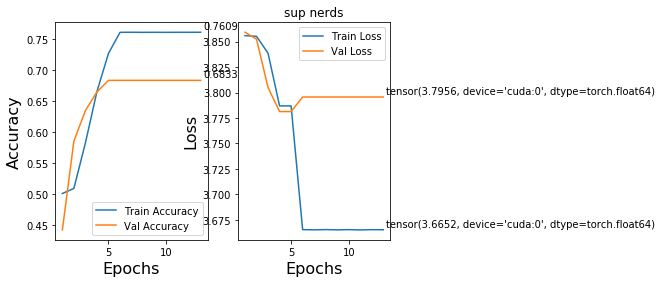

In [38]:
predicted_ys, text_model= run_model(models["my_model"], datasets["snopes"], Hyperparameters_snopes)

In [0]:
class Hyperparameters_challenge:
  lstm_hidden_size = 100
  dense_dimension = 200
  attention_hops = 30
  batch_size = datasets["challenge"].batch_size
  max_length = MAX_LENGTH
  gravity = 70
  mlp_one = 100
  mlp_two = 30
  num_classes = 4
  avg=False
  weights = torch.tensor([2, 1, 0.2, 1], dtype=torch.double).cuda()
  epochs = 12
  inner_dropout = 0
  outer_dropout = 0
  C = 0
  decay = 0
  is_debug = False
  lr=0.01
  grad_clip = False
  grad_clip_amount = 1
  early_stopping = 2
  use_early_stopping = True
  early_threshold = -0.0005
  use_better=True

torch.Size([27708, 50])
Running EPOCH: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Average loss is: tensor(1.2936, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.2823333333333333
batch count??? 72
Average loss is: tensor(1.2712, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status False
Accuracy of the model 0.2542857142857143
batch count??? 7
Running EPOCH: 2
Average loss is: tensor(1.1648, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.5397777777777778
batch count??? 72
Average loss is: tensor(1.1574, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.5482857142857143
batch count??? 7
Running EPOCH: 3
Average loss is: tensor(1.1047, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.5880555555555556
batch co

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Evaluation for: VALIDATION
Classifier 'VALIDATION' has Acc=0.634 P=0.567 R=0.443 F1=0.459 AUC=0.000
              precision    recall  f1-score   support

           0      0.483     0.165     0.246       170
           1      0.777     0.372     0.503      1234
           2      0.634     0.935     0.755      1734
           3      0.375     0.301     0.334       362

    accuracy                          0.634      3500
   macro avg      0.567     0.443     0.459      3500
weighted avg      0.650     0.634     0.598      3500


Confusion matrix:
 [[  28    9    6   15]
 [  24  459   54   54]
 [  93  661 1622  184]
 [  25  105   52  109]]


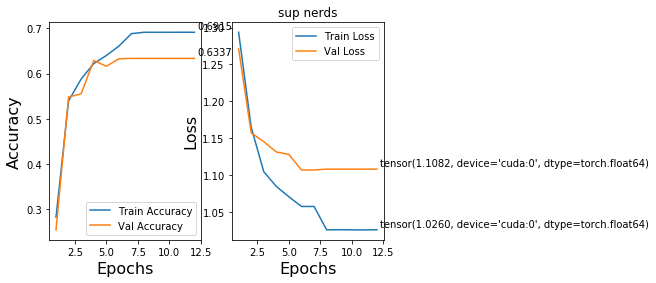

In [40]:
predicted_ys, text_model= run_model(models["my_model"], datasets["challenge"], Hyperparameters_challenge)

In [0]:
class Hyperparameters_politi:
  lstm_hidden_size = 30
  dense_dimension = 10
  attention_hops = 5
  batch_size = datasets["politifact"].batch_size
  max_length = 150
  gravity = 10
  mlp_one = 50
  mlp_two = 25
  num_classes = 1
  avg=False
  epochs = 8
  inner_dropout = 0.2
  outer_dropout = 0.5
  C = 0.5
  decay = 0
  is_debug = False
  lr=0.00008
  grad_clip = True
  grad_clip_amount = 1
  early_stopping = 2
  use_early_stopping = True
  early_threshold = -0.004
  use_better=False

torch.Size([33766, 50])
Running EPOCH: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:137: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Average loss is: tensor(1.8114, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.500672268907563
batch count??? 238
Average loss is: tensor(1.8108, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status False
Accuracy of the model 0.5189285714285714
batch count??? 28
Running EPOCH: 2
Average loss is: tensor(1.8065, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.5345378151260505
batch count??? 238
Average loss is: tensor(1.7905, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.5871428571428572
batch count??? 28
Running EPOCH: 3
Average loss is: tensor(1.7773, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.6115546218487395
batch

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


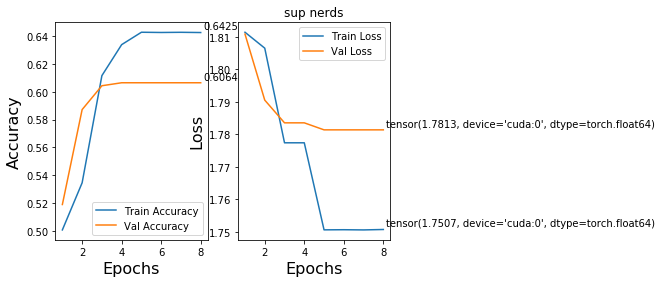

In [46]:
predicted_ys, text_model= run_model(models["my_model"], datasets["politifact"], Hyperparameters_politi)

##TEXTUAL_ENTAILMENT W/ BETTERMUSH

runnin my textual entailent model :)

In [0]:
class Hyperparameters_b_snopes:
  lstm_hidden_size = 50
  dense_dimension = 20
  attention_hops = 10
  batch_size = datasets["snopes"].batch_size
  max_length = 150
  gravity = 10
  mlp_one = 50
  mlp_two = 25
  num_classes = 1
  avg=False
  epochs = 11
  inner_dropout = 0.3
  outer_dropout = 0.6
  C = 0.6
  decay = 0
  is_debug = False
  lr=0.00004
  grad_clip = True
  grad_clip_amount = 2
  early_stopping = 2
  use_early_stopping = True
  early_threshold = -0.01
  use_better=True

torch.Size([39093, 50])
Running EPOCH: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:137: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Average loss is: tensor(2.5921, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.5009917355371901
batch count??? 121
Average loss is: tensor(2.5981, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status False
Accuracy of the model 0.442
batch count??? 15
Running EPOCH: 2
Average loss is: tensor(2.5921, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.5006611570247934
batch count??? 121
Average loss is: tensor(2.5973, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status False
Accuracy of the model 0.442
batch count??? 15
Running EPOCH: 3
Average loss is: tensor(2.5919, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.5011570247933884
batch count??? 121
Average loss is: tensor(2.5964, device='cuda:0', dtype=torch.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


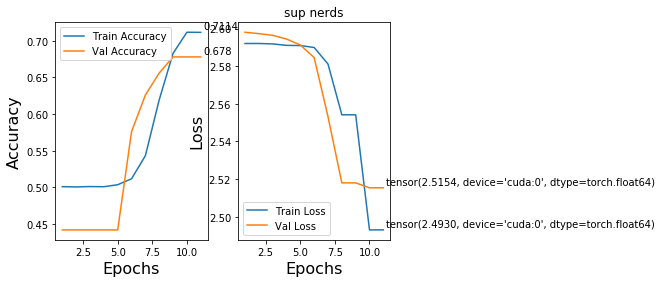

In [51]:
predicted_ys, text_model= run_model(models["my_model"], datasets["snopes"], Hyperparameters_b_snopes)

In [0]:
class Hyperparameters_b_politi:
  lstm_hidden_size = 50
  dense_dimension = 20
  attention_hops = 10
  batch_size = datasets["politifact"].batch_size
  max_length = 150
  gravity = 8
  mlp_one = 50  
  mlp_two = 25
  num_classes = 1
  avg=False
  epochs = 8
  inner_dropout = 0.2
  outer_dropout = 0.7
  weights = [1, 1, 0.25, 1]
  C = 0.6
  decay = 0
  is_debug = False
  lr=0.00007
  grad_clip = True
  grad_clip_amount = 2
  early_stopping = 2
  use_early_stopping = True
  early_threshold = -0.009
  use_better=True

torch.Size([33766, 50])
Running EPOCH: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:137: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Average loss is: tensor(2.5914, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.4992436974789916
batch count??? 238
Average loss is: tensor(2.5902, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status False
Accuracy of the model 0.48464285714285715
batch count??? 28
Running EPOCH: 2
Average loss is: tensor(2.5807, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.563655462184874
batch count??? 238
Average loss is: tensor(2.5705, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.6017857142857143
batch count??? 28
Running EPOCH: 3
Average loss is: tensor(2.5617, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.6094537815126051
batc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


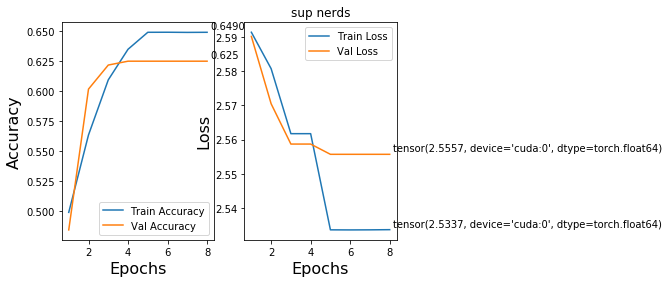

In [53]:
predicted_ys, text_model= run_model(models["my_model"], datasets["politifact"], Hyperparameters_b_politi)

WOAH WERE DOIN SOME VALIDATION
PLEASE VALIDATE ME

In [55]:
evaluation_summary("textual entailment model", predicted_ys.cpu() ,datasets["politifact"].test_data, True)

Evaluation for: textual entailment model
Classifier 'textual entailment model' has Acc=0.636 P=0.631 R=0.632 F1=0.632 AUC=0.631
              precision    recall  f1-score   support

         0.0      0.581     0.604     0.592      1251
         1.0      0.681     0.660     0.671      1604

    accuracy                          0.636      2855
   macro avg      0.631     0.632     0.632      2855
weighted avg      0.637     0.636     0.636      2855


Confusion matrix:
 [[ 756  545]
 [ 495 1059]]


(0.6312793247843209, 0.6322704928326666, 0.6357267950963222, 0.631577066553372)

JUST TESTIN HERE

##running sheena's model

In [0]:
class SheenaParameters_snopes:
  lstm_hidden_size = 50
  dense_dimension = 20
  attention_hops = 10
  batch_size = datasets["snopes"].batch_size
  max_length = 150
  gravity = 70
  num_classes = 1
  avg=True
  epochs = 9
  inner_dropout=0.5
  outer_dropout=0.5
  C = 0.6
  is_debug = False
  grad_clip = True
  grad_clip_amount = 2
  lr=0.00007
  decay = 0
  early_stopping = 2
  use_early_stopping = True
  early_threshold = -0.009
  use_better = False
  

Running EPOCH: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:137: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Average loss is: tensor(2.5790, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.49892561983471073
batch count??? 121
Average loss is: tensor(2.5746, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status False
Accuracy of the model 0.558
batch count??? 15
Running EPOCH: 2
Average loss is: tensor(2.5781, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.49900826446280994
batch count??? 121
Average loss is: tensor(2.5743, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status False
Accuracy of the model 0.558
batch count??? 15
Running EPOCH: 3
Average loss is: tensor(2.5730, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.5080165289256199
batch count??? 121
Average loss is: tensor(2.5752, device='cuda:0', dtype=torc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[[550 287]
 [268 395]]


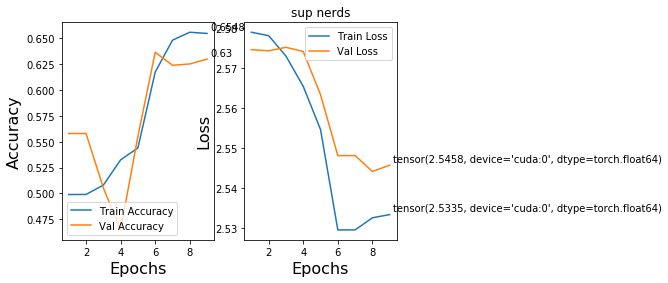

In [57]:
predicted_ys, text_model= run_model(models["sheena_model"], datasets["snopes"], SheenaParameters_snopes)

In [0]:
class SheenaParameters_politi:
  lstm_hidden_size = 50
  dense_dimension = 20
  attention_hops = 10
  batch_size = datasets["politifact"].batch_size
  max_length = 150
  gravity = 70
  num_classes = 1
  avg=True
  epochs = 11
  inner_dropout=0.3
  outer_dropout=0.6
  C = 0.6
  is_debug = False
  grad_clip = True
  grad_clip_amount = 1
  lr=0.00005
  decay = 0
  early_stopping = 2
  use_early_stopping = True
  use_better = False
  early_threshold = -0.0005

Running EPOCH: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:137: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Average loss is: tensor(2.5784, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.5021008403361344
batch count??? 238
Average loss is: tensor(2.5769, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status False
Accuracy of the model 0.5189285714285714
batch count??? 28
Running EPOCH: 2
Average loss is: tensor(2.5760, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.5021008403361344
batch count??? 238
Average loss is: tensor(2.5737, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.5182142857142857
batch count??? 28
Running EPOCH: 3
Average loss is: tensor(2.5689, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.5198739495798319
batc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


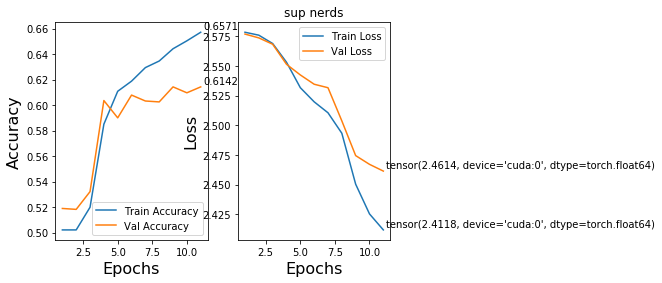

In [65]:
sheena_predicted_ys, model = run_model(models["sheena_model"], datasets["politifact"], SheenaParameters_politi)


In [0]:
class SheenaParameters_b_snopes:
  lstm_hidden_size = 50
  dense_dimension = 20
  attention_hops = 10
  batch_size = datasets["snopes"].batch_size
  max_length = 150
  gravity = 70
  num_classes = 1
  mlp_one = 25  
  mlp_two = 10
  avg=False
  epochs = 14
  inner_dropout=0.3
  outer_dropout=0.6
  C = 0.6
  is_debug = False
  grad_clip = True
  grad_clip_amount = 1
  lr=0.00005
  decay = 0
  early_stopping = 2
  use_early_stopping = True
  early_threshold = -0.00013
  use_better = True
  

Running EPOCH: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:137: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Average loss is: tensor(2.5783, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.49892561983471073
batch count??? 121
Average loss is: tensor(2.5765, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status False
Accuracy of the model 0.5573333333333333
batch count??? 15
Running EPOCH: 2
Average loss is: tensor(2.5780, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.4996694214876033
batch count??? 121
Average loss is: tensor(2.5765, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status False
Accuracy of the model 0.56
batch count??? 15
Running EPOCH: 3
Average loss is: tensor(2.5779, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.4994214876033058
batch count??? 121
Average loss is: tensor(2.5764, device='cuda:0',

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Evaluation for: VALIDATION
Classifier 'VALIDATION' has Acc=0.625 P=0.625 R=0.624 F1=0.623 AUC=0.625
              precision    recall  f1-score   support

         0.0      0.625     0.678     0.650       771
         1.0      0.626     0.569     0.596       729

    accuracy                          0.625      1500
   macro avg      0.625     0.624     0.623      1500
weighted avg      0.625     0.625     0.624      1500


Confusion matrix:
 [[523 314]
 [248 415]]


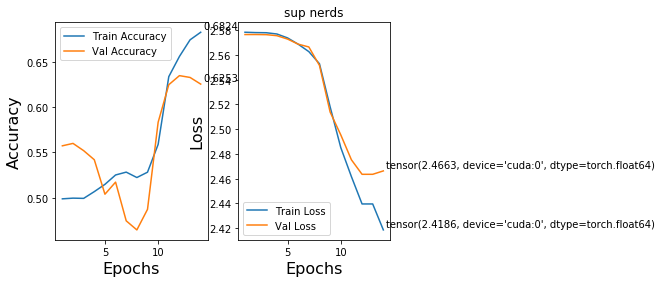

In [70]:
predicted_ys, text_model= run_model(models["sheena_model"], datasets["snopes"], SheenaParameters_b_snopes)

In [0]:
class SheenaParameters_b_politi:
  lstm_hidden_size = 50
  dense_dimension = 20
  attention_hops = 10
  batch_size = datasets["politifact"].batch_size
  max_length = 150
  gravity = 70
  num_classes = 1
  avg=False
  epochs = 8
  inner_dropout=0.3
  outer_dropout=0.5
  C = 0.6
  is_debug = False
  grad_clip = True
  grad_clip_amount=1
  lr=0.0001
  decay = 0
  early_stopping = 2
  use_early_stopping = True
  use_better = True
  early_threshold = -0.013

Running EPOCH: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:137: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Average loss is: tensor(2.5774, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.5032773109243698
batch count??? 238
Average loss is: tensor(2.5743, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status False
Accuracy of the model 0.5242857142857142
batch count??? 28
Running EPOCH: 2
Average loss is: tensor(2.5610, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.5616386554621848
batch count??? 238
Average loss is: tensor(2.5554, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.5778571428571428
batch count??? 28
Running EPOCH: 3
Average loss is: tensor(2.5315, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.6071008403361344
batc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


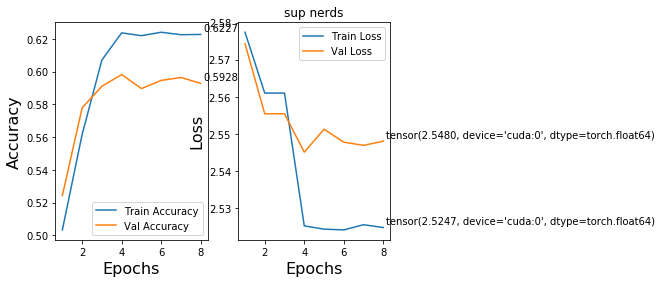

In [76]:
predicted_ys, text_model= run_model(models["sheena_model"], datasets["politifact"], SheenaParameters_b_politi)

In [78]:
evaluation_summary("sheena model",predicted_ys.cpu(), datasets["politifact"].test_data, True)


Evaluation for: sheena model
Classifier 'sheena model' has Acc=0.634 P=0.628 R=0.630 F1=0.628 AUC=0.628
              precision    recall  f1-score   support

         0.0      0.561     0.606     0.583      1205
         1.0      0.694     0.654     0.674      1650

    accuracy                          0.634      2855
   macro avg      0.628     0.630     0.628      2855
weighted avg      0.638     0.634     0.635      2855


Confusion matrix:
 [[ 730  571]
 [ 475 1079]]


(0.627722017614408, 0.6298742612850496, 0.6336252189141857, 0.6280674197157783)

##OK TESTING ON BROKE DECLARE

In [0]:
class DeclareParameters_snopes:
  lstm_hidden_size = 64
  attention_hops = 10
  batch_size = datasets["snopes"].batch_size
  max_length = 100
  num_classes = 1
  inner_dropout=0
  outer_dropout=0.5
  epochs = 20
  C = 0
  is_debug = False
  lr=0.0001
  decay = 0.01
  filters = [datasets["snopes"].batch_size, 100, 8]
  grad_clip = False
  grad_clip_amount = 3
  early_stopping = 2
  use_early_stopping = True
  early_threshold = -0.0004

Running EPOCH: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Average loss is: tensor(0.7572, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.5009090909090909
batch count??? 121
Average loss is: tensor(0.7661, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status False
Accuracy of the model 0.442
batch count??? 15
Running EPOCH: 2
Average loss is: tensor(0.7454, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.5010743801652893
batch count??? 121
Average loss is: tensor(0.7550, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.442
batch count??? 15
Running EPOCH: 3
Average loss is: tensor(0.7365, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.5007438016528926
batch count??? 121
Average los

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Evaluation for: VALIDATION
Classifier 'VALIDATION' has Acc=0.633 P=0.647 R=0.651 F1=0.633 AUC=0.647
              precision    recall  f1-score   support

         0.0      0.529     0.740     0.617       599
         1.0      0.765     0.563     0.648       901

    accuracy                          0.633      1500
   macro avg      0.647     0.651     0.633      1500
weighted avg      0.671     0.633     0.636      1500


Confusion matrix:
 [[443 394]
 [156 507]]


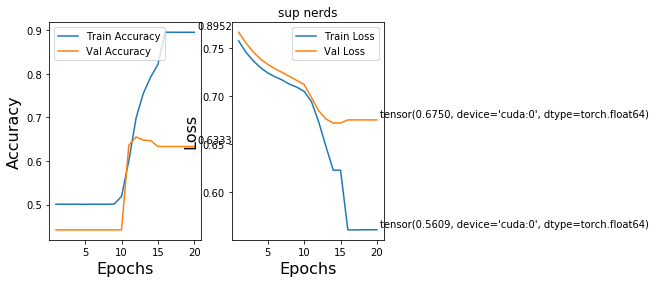

In [80]:
predicted_ys, text_model= run_model(models["real_declare"], datasets["snopes"], DeclareParameters_snopes)


In [0]:
class DeclareParameters_politi:
  lstm_hidden_size = 64
  attention_hops = 10
  batch_size = datasets["politifact"].batch_size
  max_length = 100
  num_classes = 1
  inner_dropout=0
  outer_dropout=0.5
  epochs = 20
  C = 0
  is_debug = False
  lr=0.0001
  decay = 0.01
  filters = [datasets["politifact"].batch_size, 100, 8]
  grad_clip = False
  grad_clip_amount = 3
  early_stopping = 2
  use_early_stopping = True
  early_threshold = -0.0004

Running EPOCH: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Average loss is: tensor(0.7392, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.49865546218487394
batch count??? 238
Average loss is: tensor(0.7289, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status False
Accuracy of the model 0.4810714285714286
batch count??? 28
Running EPOCH: 2
Average loss is: tensor(0.7234, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.5020588235294118
batch count??? 238
Average loss is: tensor(0.7169, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.4810714285714286
batch count??? 28
Running EPOCH: 3
Average loss is: tensor(0.7126, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.5237394957983194
bat

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


              precision    recall  f1-score   support

         0.0      0.579     0.627     0.602      1245
         1.0      0.680     0.635     0.657      1555

    accuracy                          0.631      2800
   macro avg      0.630     0.631     0.629      2800
weighted avg      0.635     0.631     0.632      2800


Confusion matrix:
 [[780 567]
 [465 988]]


(tensor([0., 0., 0.,  ..., 1., 0., 1.], device='cuda:0', dtype=torch.float64),
 RealDeclare(
   (premise_embeddings): Embedding(100, 50)
   (hypothesis_processor): SequenceProcessor(
     (embeddings): Embedding(100, 50)
     (normaliser): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (cool_lstm): LSTM(50, 64, batch_first=True, bidirectional=True)
     (dropout): Dropout(p=0, inplace=False)
   )
   (premise_linear): Linear(in_features=10000, out_features=128, bias=True)
   (linear_penultimate): Linear(in_features=100, out_features=8, bias=True)
   (linear_almost_there): Linear(in_features=8, out_features=8, bias=True)
   (dropout0): Dropout(p=0.5, inplace=False)
   (dropout1): Dropout(p=0.5, inplace=False)
   (dropout2): Dropout(p=0.5, inplace=False)
   (linear_final): Linear(in_features=8, out_features=1, bias=True)
 ))

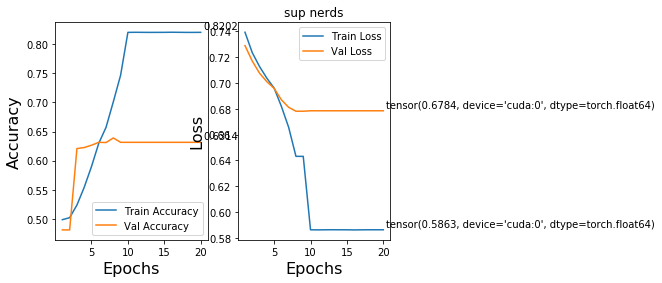

In [84]:
run_model(models["real_declare"], datasets["politifact"], DeclareParameters_politi)

TESTING ON REAL DECLARE

Running EPOCH: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Average loss is: tensor(0.7430, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.5027310924369748
batch count??? 238
Average loss is: tensor(0.7315, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status False
Accuracy of the model 0.5189285714285714
batch count??? 28
Running EPOCH: 2
Average loss is: tensor(0.7249, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status False
Accuracy of the model 0.5230252100840336
batch count??? 238
Average loss is: tensor(0.7175, device='cuda:0', dtype=torch.float64) while validation_status: True and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.5189285714285714
batch count??? 28
Running EPOCH: 3
Average loss is: tensor(0.7119, device='cuda:0', dtype=torch.float64) while validation_status: False and stopping_status tensor(False, device='cuda:0')
Accuracy of the model 0.5488655462184874
batc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[[907 440]
 [575 878]]


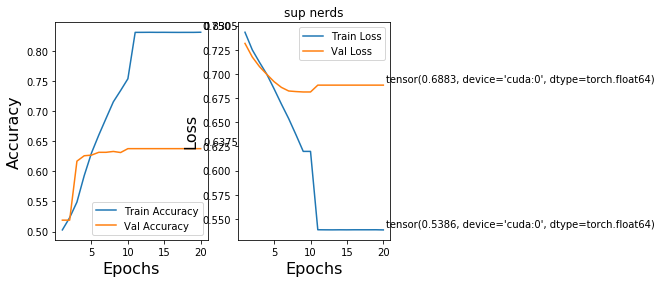

In [85]:
declare_predicted_ys, _ =  run_model(models["real_declare"], datasets["politifact"], DeclareParameters_politi)

In [0]:
evaluation_summary("real declare model", declare_predicted_ys.cpu(), datasets["politifact"].test_data, True)


                  "model_name":model_name,
                  "dataset_name": dataset_name,
                  "precision":precision,
                  "recall": recall,
                  "accuracy": accuracy,
                  "f1": f1,
                  "auc": auc

In [0]:
all_params = {
    "my_model": {"politifact": Hyperparameters_politi, "snopes":Hyperparameters_snopes},
    #"my_model_better":{"politifact": Hyperparameters_b_politi, "snopes":Hyperparameters_b_snopes},
    "sheena_model": {"politifact": SheenaParameters_politi, "snopes": SheenaParameters_snopes},
    #"sheena_model_better": {"politifact": SheenaParameters_b_politi, "snopes" : SheenaParameters_b_snopes},
    "real_declare": {"politifact":DeclareParameters_politi, "snopes": DeclareParameters_snopes}
}

##VALIDATION LAND

In [0]:
avg_amount = 5
per_avg_amount = 10
import csv

full_results = []
avg_results = []
processed_results = []



for data_name in datasets:
  for model_name in models:
    some_results = []
  
    for per_avg_i in range(per_avg_amount):
      predicted_ys, model = run_model(models[model_name], datasets[data_name], all_params[model_name][data_name])
      full_results.append(get_results(model_name, data_name, predicted_ys.cpu(), datasets[data_name].test_data))
      some_results.append(get_results(model_name, data_name, predicted_ys.cpu(), datasets[data_name].test_data))
      
    processed_results.append(process_results(list_to_dict(some_results)))
    print(processed_results)
    

In [0]:
for result in full_results:
  print(result)